In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap as LCM
 

Text(0.5, 1.0, 'make_circles')

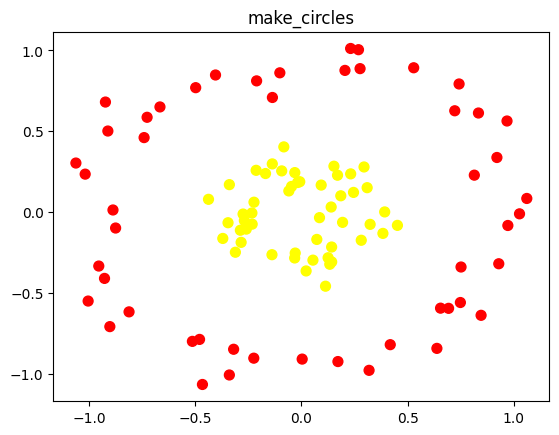

In [2]:
from sklearn.datasets._samples_generator import make_circles
X,y =make_circles(n_samples=100, noise=0.1, factor=0.3,shuffle=True, random_state=1)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')
plt.title('make_circles')

In [3]:

X_train,X_test,y_train,y_test =tts(X,y, test_size=0.2, random_state=1)


In [4]:
classifier = SVC(kernel='linear')

In [5]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

AS WE CAN SEE THAT THE MODEL ACCURACY IS MUCH MUCH LOWER THAN STANDARD WE NOW MOVE ON TO FIX THIS AND TRY OUT DIFFERENT WAYS

In [24]:

def decision_boundary_plot(X, y, model, title="DECISION BOUNDARY", cmap=('orange', 'green'), resolution=0.01):
    """
    Plots the decision boundary for a classifier in 2D.

    Parameters:
    - X: ndarray, shape (n_samples, 2) — Input features
    - y: ndarray, shape (n_samples,) — Target labels
    - model: trained classifier with a `.predict()` method
    - title: str — Title of the plot
    - cmap: tuple — Colors for the classes
    - resolution: float — Step size for the meshgrid
    """

    # CREATE A COLORMAP

    color_map = LCM(cmap)

    #DEFINE THE MESHGRID BOUNDARIES

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # PREDICT THE LABEL FOR EACH POINT IN THE GRID
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    z = model.predict(grid_points).reshape(xx.shape)

    # CREATE PLOT 
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, z, cmap=color_map, alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=color_map, edgecolors='k', s=60)
    plt.title(title)
    plt.xlabel("FEATURE 1")
    plt.ylabel("FEATURE 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

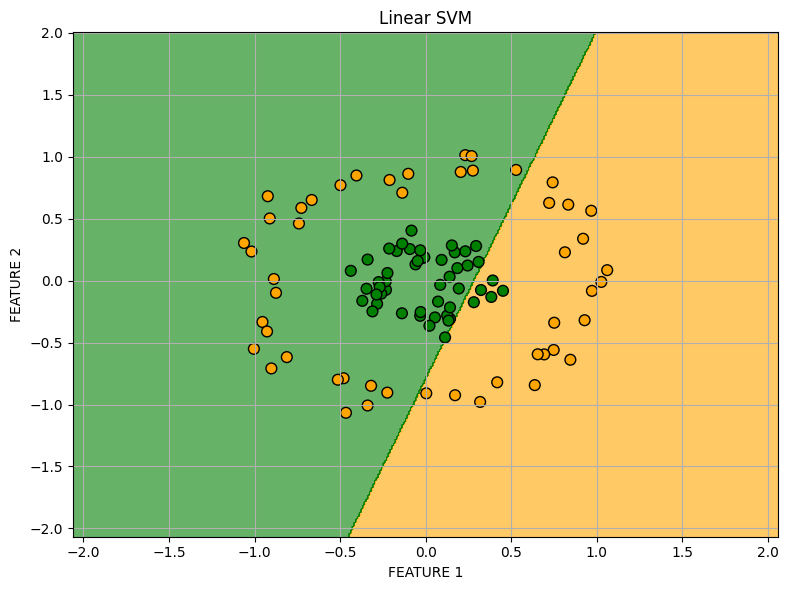

In [25]:
decision_boundary_plot(X, y, classifier, title="Linear SVM")



In [11]:
def plt_3d_plot(X,y):
    r =np.exp(-(X**2).sum(1))
    ax =plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax;


<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

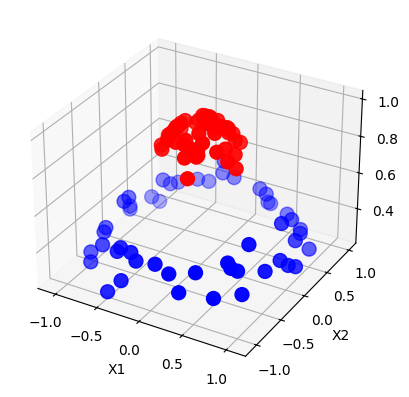

In [12]:
plt_3d_plot(X,y)

In [13]:
rbf_classifier =SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)
y_pred =rbf_classifier.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


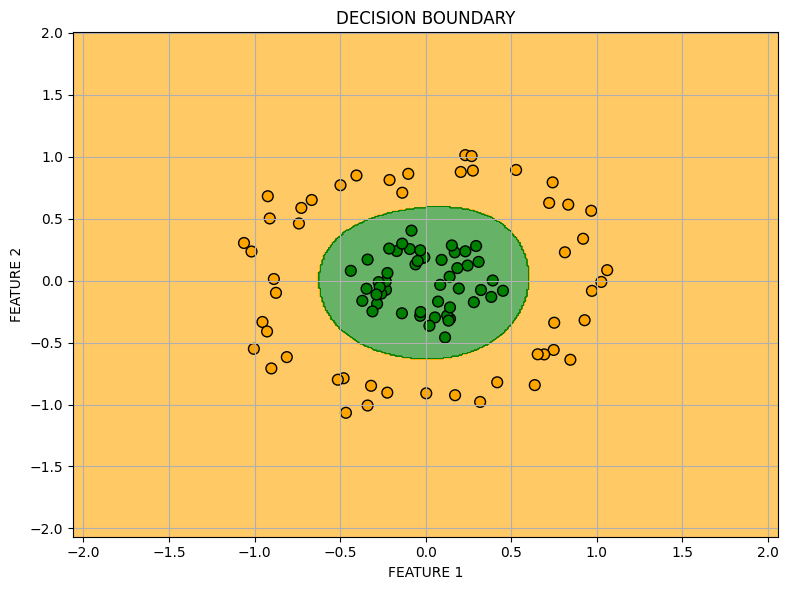

In [26]:
decision_boundary_plot(X,y,rbf_classifier)

In [16]:
poly_classifier=SVC(kernel='poly',degree=2)
poly_classifier.fit(X_train,y_train)
poly_y_pred=poly_classifier.predict(X_test)
poly_acc_score=accuracy_score(y_test,poly_y_pred)
print(poly_acc_score)

1.0


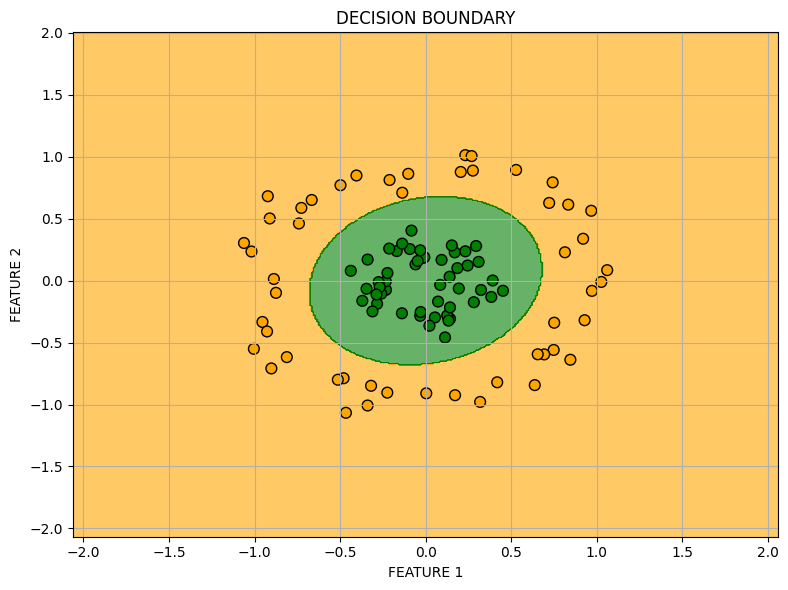

In [27]:
decision_boundary_plot(X,y,poly_classifier)

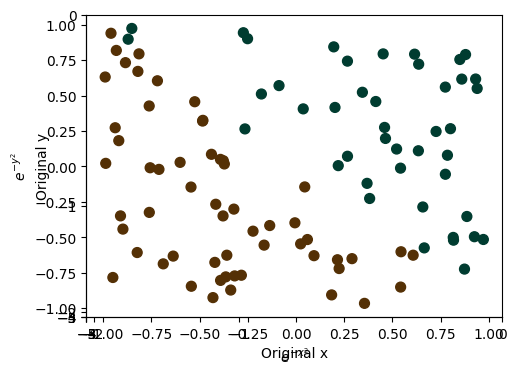

In [40]:
fig, ax = plt.subplots()
sc = ax.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='BrBG')

# Adjust the position of the main axes to make space for secondary axes labels
fig.subplots_adjust(left=0.25, bottom=0.25)  # Increased padding for better spacing
ax.set_xlabel(r"$e^{-x^2}$")
ax.set_ylabel(r"$e^{-y^2}$")

# Secondary x-axis for original x values
def inv_x(x_new):
    return np.sign(x_new) * np.sqrt(-np.log(np.clip(x_new, 1e-10, 1)))

def fwd_x(x):
    return np.exp(-x**2)

secax_x = ax.secondary_xaxis('bottom', functions=(inv_x, fwd_x))
secax_x.set_xlabel("Original x")
# secax_x.set_offset_position('outward')  # Removed: not a valid method

# Secondary y-axis for original y values
def inv_y(y_new):
    return np.sign(y_new) * np.sqrt(-np.log(np.clip(y_new, 1e-10, 1)))

def fwd_y(y):
    return np.exp(-y**2)

secax_y = ax.secondary_yaxis('left', functions=(inv_y, fwd_y))
secax_y.set_ylabel("Original y")
# secax_y.set_offset_position('outward')  # Removed: not a valid method

plt.show()

C:\Users\LINKON\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


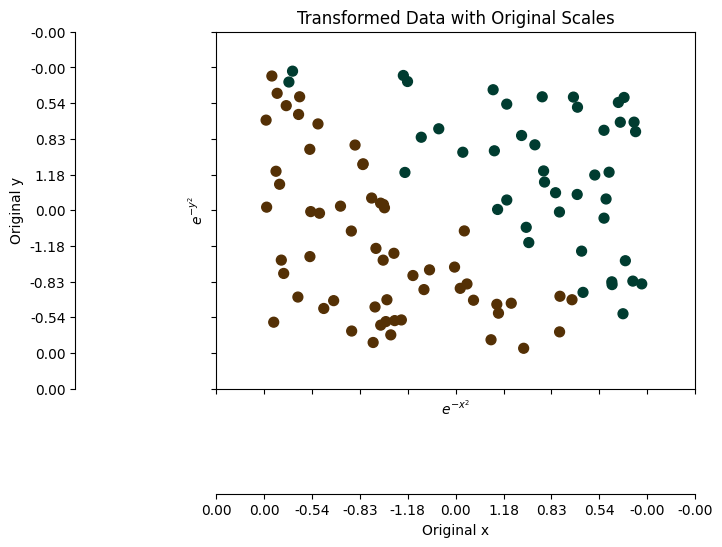

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec # Import GridSpec

# Assuming X_new and y are already defined from your data
# Example dummy data for demonstration
np.random.seed(42)
X_new = np.random.rand(100, 2) * 2 - 1 # Data between -1 and 1
y = (X_new[:, 0] + X_new[:, 1] > 0).astype(int) # Example classification

# Define the transformation functions
def inv_x(x_new):
    return np.sign(x_new) * np.sqrt(-np.log(np.clip(np.abs(x_new), 1e-10, 1)))

def fwd_x(x):
    return np.exp(-x**2)

def inv_y(y_new):
    return np.sign(y_new) * np.sqrt(-np.log(np.clip(np.abs(y_new), 1e-10, 1)))

def fwd_y(y):
    return np.exp(-y**2)

# Create a figure and a GridSpec
# We'll create a 2x2 grid for layout control
fig = plt.figure(figsize=(8, 6)) # Adjust figure size as needed
gs = gridspec.GridSpec(2, 2, width_ratios=[0.15, 0.85], height_ratios=[0.85, 0.15]) # Adjust ratios for spacing

# Create the main axes for the transformed data (top right)
ax_main = fig.add_subplot(gs[0, 1])
sc = ax_main.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='BrBG')
ax_main.set_xlabel(r"$e^{-x^2}$")
ax_main.set_ylabel(r"$e^{-y^2}$")
ax_main.set_title("Transformed Data with Original Scales") # Added a title

# Create a new axes for the original y-axis (top left)
ax_orig_y = fig.add_subplot(gs[0, 0], sharey=ax_main) # Share y-axis with main plot
# We'll hide the scatter plot on this axis
ax_orig_y.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='BrBG', alpha=0) # Make points invisible
ax_orig_y.set_ylabel("Original y")
ax_orig_y.set_xlabel("") # No x-label for this axis
ax_orig_y.xaxis.set_visible(False) # Hide the x-axis ticks and labels
ax_orig_y.spines['right'].set_visible(False) # Hide the right spine
ax_orig_y.spines['top'].set_visible(False) # Hide the top spine
ax_orig_y.spines['bottom'].set_visible(False) # Hide the bottom spine

# Set ticks and labels for the original y-axis
# We need to determine appropriate tick locations for the transformed y-axis
# and then calculate the corresponding original y values
main_y_ticks = ax_main.get_yticks()
original_y_ticks = inv_y(main_y_ticks)
ax_orig_y.set_yticks(main_y_ticks) # Use the same tick locations as the main y-axis
ax_orig_y.set_yticklabels([f'{tick:.2f}' for tick in original_y_ticks]) # Set labels to original y values


# Create a new axes for the original x-axis (bottom right)
ax_orig_x = fig.add_subplot(gs[1, 1], sharex=ax_main) # Share x-axis with main plot
# We'll hide the scatter plot on this axis
ax_orig_x.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='BrBG', alpha=0) # Make points invisible
ax_orig_x.set_xlabel("Original x")
ax_orig_x.set_ylabel("") # No y-label for this axis
ax_orig_x.yaxis.set_visible(False) # Hide the y-axis ticks and labels
ax_orig_x.spines['left'].set_visible(False) # Hide the left spine
ax_orig_x.spines['top'].set_visible(False) # Hide the top spine
ax_orig_x.spines['right'].set_visible(False) # Hide the right spine

# Set ticks and labels for the original x-axis
# We need to determine appropriate tick locations for the transformed x-axis
# and then calculate the corresponding original x values
main_x_ticks = ax_main.get_xticks()
original_x_ticks = inv_x(main_x_ticks)
ax_orig_x.set_xticks(main_x_ticks) # Use the same tick locations as the main x-axis
ax_orig_x.set_xticklabels([f'{tick:.2f}' for tick in original_x_ticks]) # Set labels to original x values


# Hide the tick labels on the shared axes of the main plot to avoid redundancy
ax_main.xaxis.set_tick_params(labelbottom=False)
ax_main.yaxis.set_tick_params(labelleft=False)


# Optional: Add an empty subplot in the bottom left if needed for alignment or other elements
# ax_empty = fig.add_subplot(gs[1, 0])
# ax_empty.axis('off') # Turn off axis lines and labels

# Adjust layout to prevent overlapping (constrained_layout is still helpful here)
fig.set_constrained_layout(True)


plt.show()


In [19]:
# Example points transformation
original_points = np.array([
    [0, 0],     # Origin
    [1, 1],     # Medium distance
    [2, 2],     # Far point
])

transformed = np.exp(-(original_points**2))
print("Original → Transformed")
for orig, trans in zip(original_points, transformed):
    print(f"({orig[0]}, {orig[1]}) → ({trans[0]:.3f}, {trans[1]:.3f})")



Original → Transformed
(0, 0) → (1.000, 1.000)
(1, 1) → (0.368, 0.368)
(2, 2) → (0.018, 0.018)
